In [1]:
from climada.hazard import TCTracks


cat5_NA = ["1992230N11325","1998295N12284","2003249N14329","2004247N10332","2005192N11318","2005236N23285","2005261N21290",
          "2005289N18282","2007225N12331","2007244N12303","2016273N13300","2017242N16333","2017260N12310","2018280N18273",
          "2019236N10314","2019266N11341","2020318N16289"]
names= ["ANDREW","MITCH","ISABEL","IVAN","EMILY","KATRINA","RITA","WILMA","DEAN","FELIX","MATTHEW","IRMA","MARIA",
"MICHAEL","DORIAN","LORENZO","IOTA"]

2021-03-14 23:13:30,482 - climada - DEBUG - Loading default config file: /Users/zhangwenlan/miniconda3/climada_python-1.5.1/climada/conf/defaults.conf


In [30]:
len(cat5_NA)

17

In [29]:
len(names)

15

In [2]:
# ?
tr = TCTracks() 
tr.read_ibtracs_netcdf(year_range=(2000, 2020), basin='NA') # From Tracks

2021-03-14 23:14:32,610 - climada.hazard.tc_tracks - INFO - Progress: 10%
2021-03-14 23:14:33,507 - climada.hazard.tc_tracks - INFO - Progress: 20%
2021-03-14 23:14:34,378 - climada.hazard.tc_tracks - INFO - Progress: 30%
2021-03-14 23:14:35,236 - climada.hazard.tc_tracks - INFO - Progress: 40%
2021-03-14 23:14:36,106 - climada.hazard.tc_tracks - INFO - Progress: 50%
2021-03-14 23:14:36,965 - climada.hazard.tc_tracks - INFO - Progress: 61%
2021-03-14 23:14:37,828 - climada.hazard.tc_tracks - INFO - Progress: 71%
2021-03-14 23:14:38,744 - climada.hazard.tc_tracks - INFO - Progress: 81%
2021-03-14 23:14:39,628 - climada.hazard.tc_tracks - INFO - Progress: 91%


In [3]:
# script for extracting cat 5 storms

import pandas as pd

t = [tr.data[i].sid for i in range(len(tr.data)) if tr.data[i].category == 5]

tr_cat5 = TCTracks()
tr_cat5.read_ibtracs_netcdf(storm_id=t, basin='NA')

names = [tr_cat5.data[i].name for i in range(len(tr_cat5.data))]
sid = [tr_cat5.data[i].sid for i in range(len(tr_cat5.data))]
sidnames = pd.DataFrame(names,sid)


2021-03-14 23:14:43,439 - climada.hazard.tc_tracks - INFO - Progress: 13%
2021-03-14 23:14:43,498 - climada.hazard.tc_tracks - INFO - Progress: 26%
2021-03-14 23:14:43,557 - climada.hazard.tc_tracks - INFO - Progress: 40%
2021-03-14 23:14:43,619 - climada.hazard.tc_tracks - INFO - Progress: 53%
2021-03-14 23:14:43,672 - climada.hazard.tc_tracks - INFO - Progress: 66%
2021-03-14 23:14:43,729 - climada.hazard.tc_tracks - INFO - Progress: 80%
2021-03-14 23:14:43,789 - climada.hazard.tc_tracks - INFO - Progress: 93%


/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .to

/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)
/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .to

IndexError: list index out of range

/Users/zhangwenlan/miniconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:215: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **style)


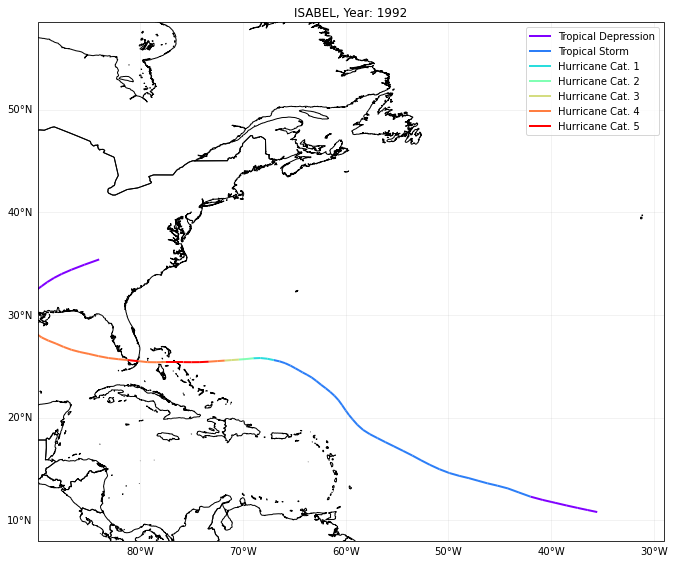

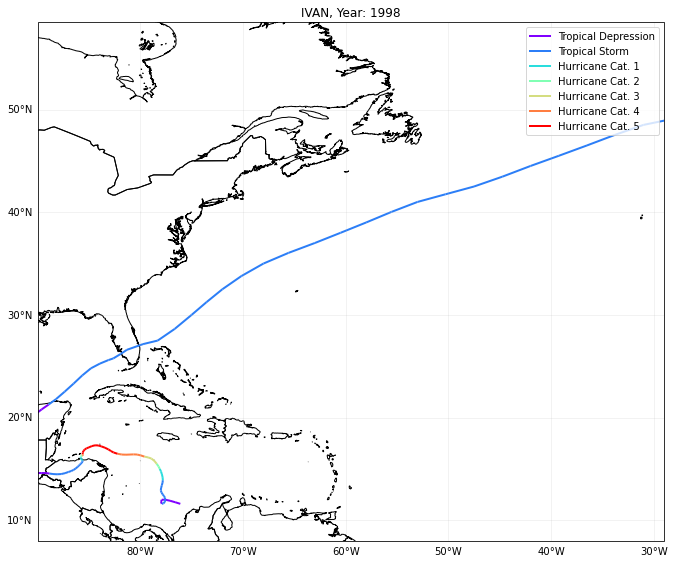

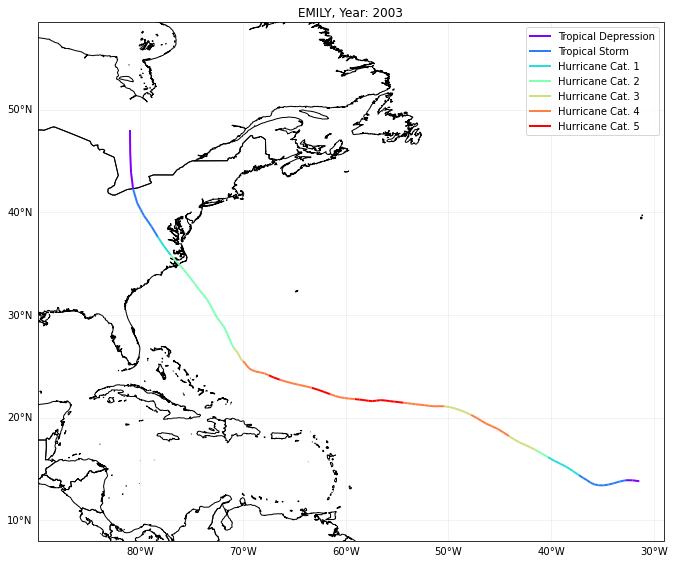

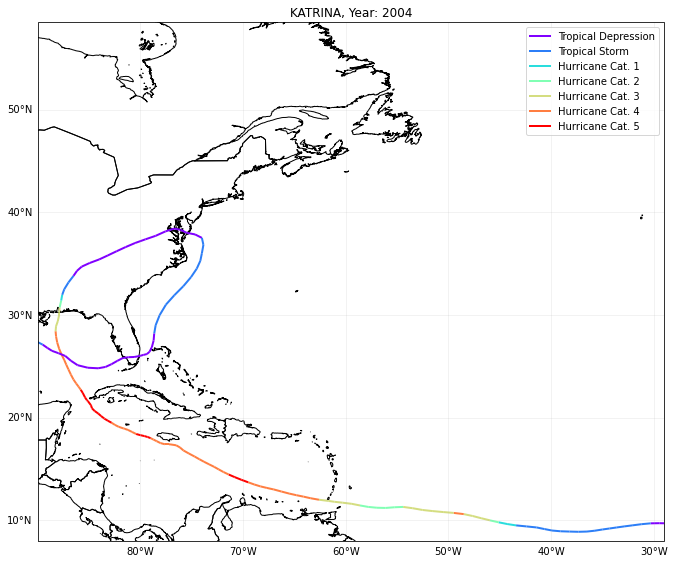

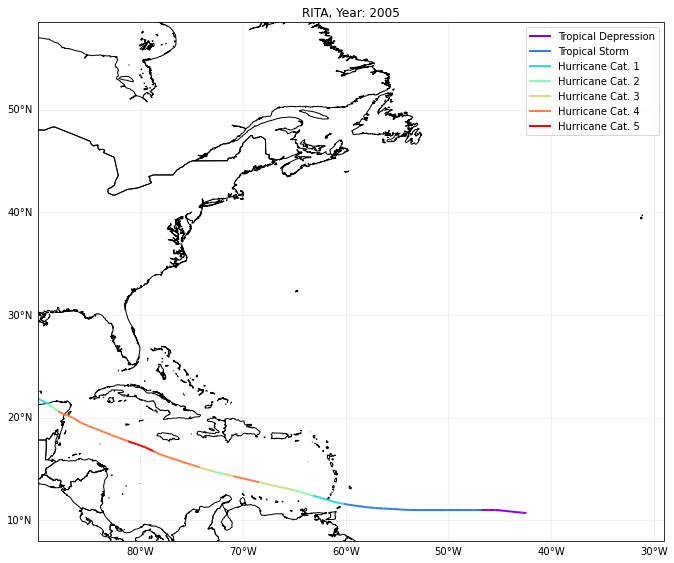

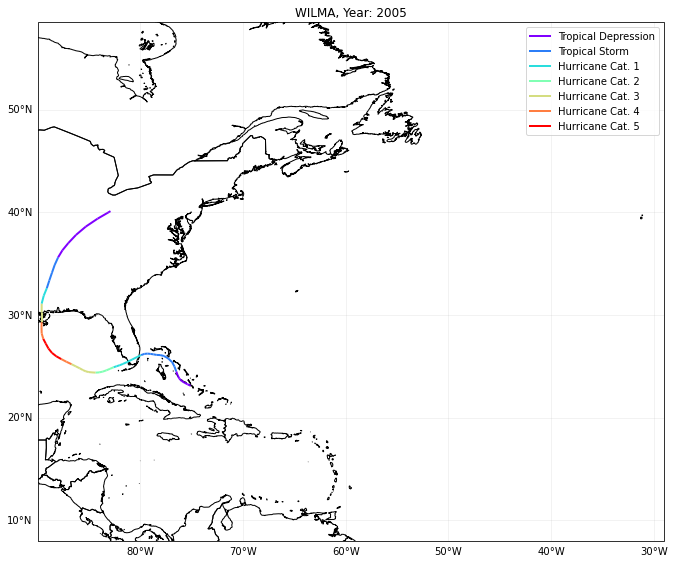

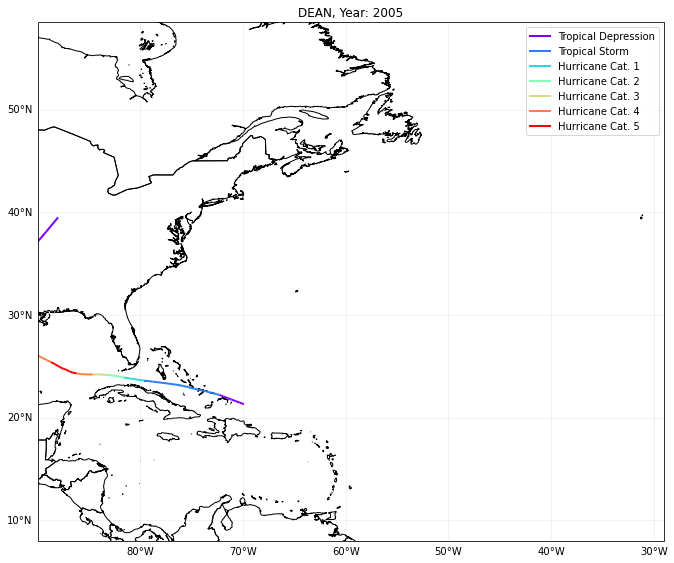

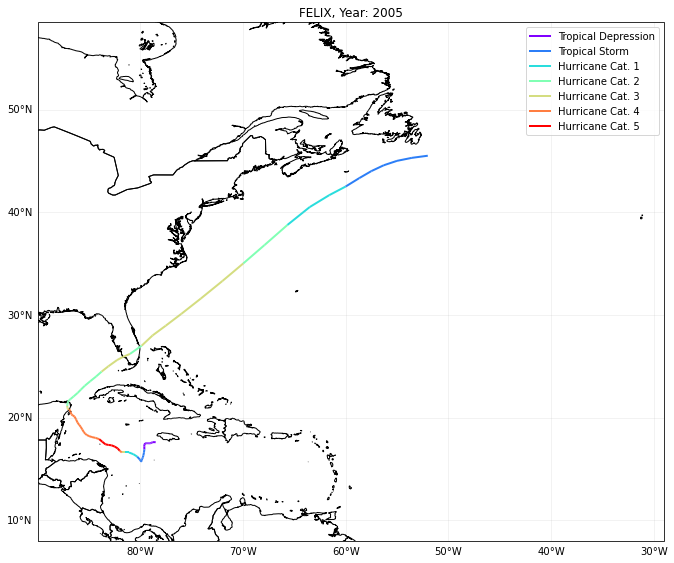

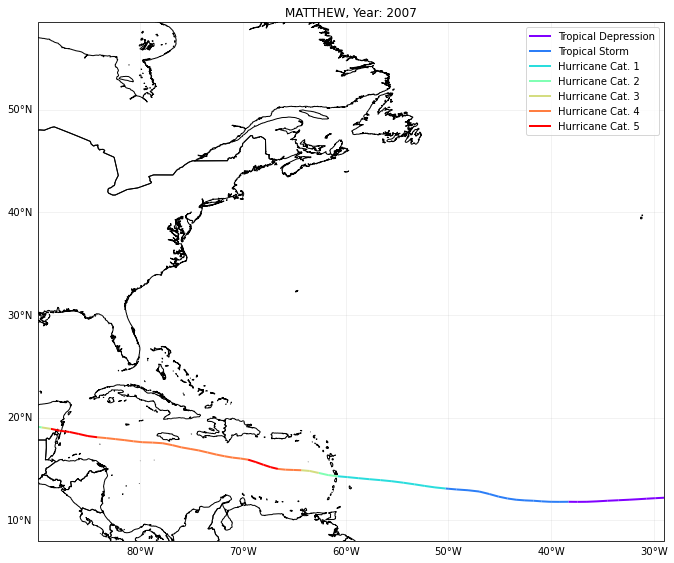

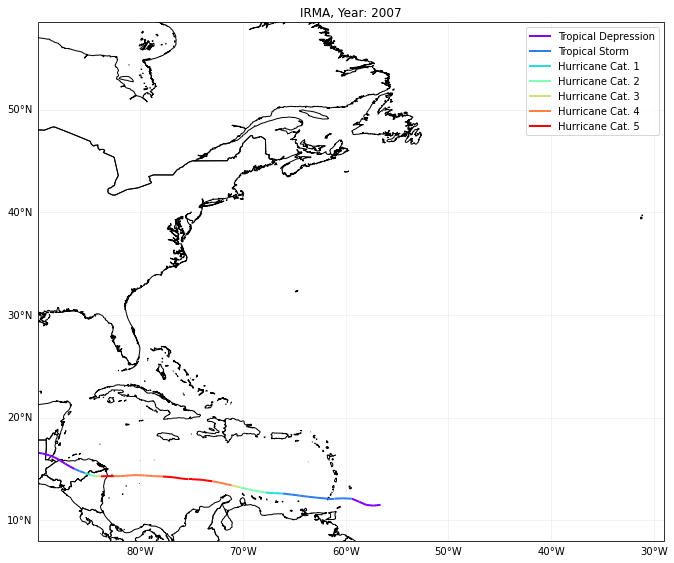

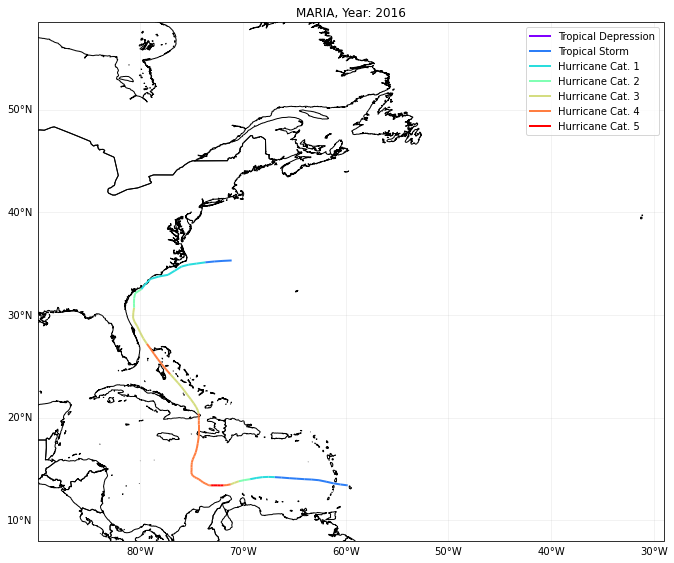

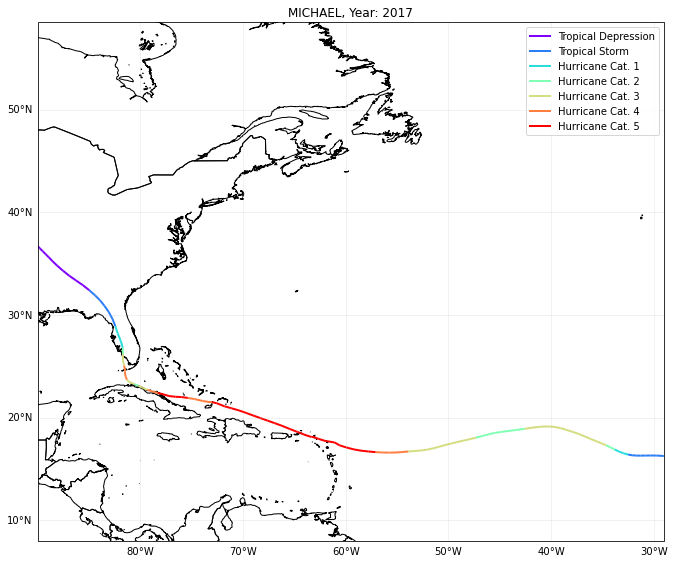

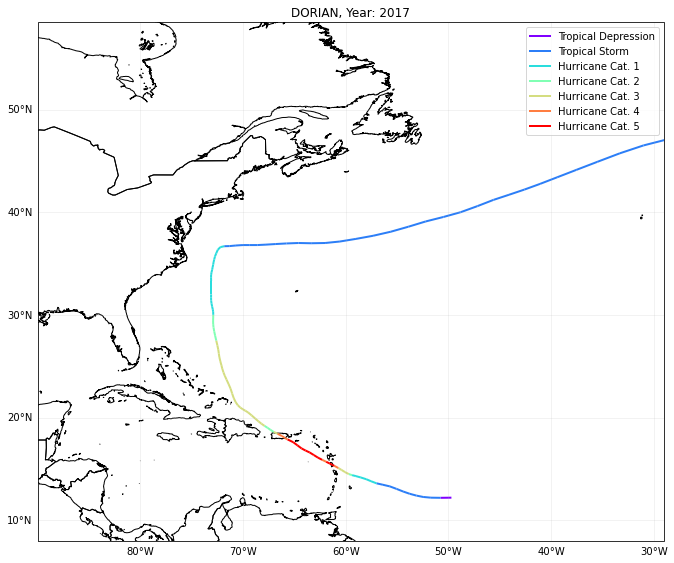

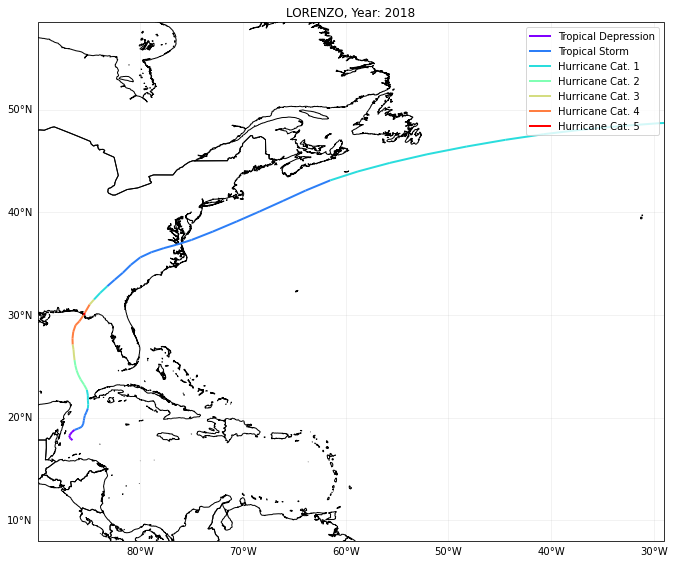

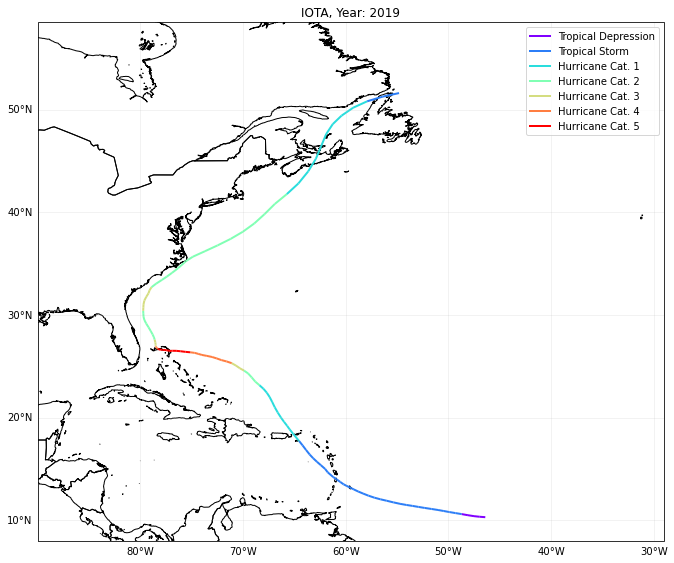

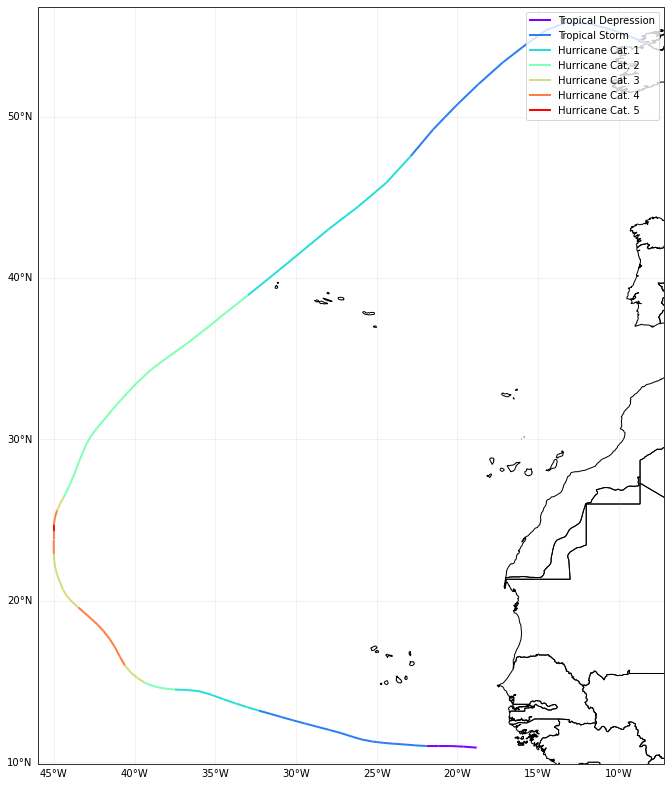

In [5]:
i = 0

for i in range(len(cat5_NA)):
    tracks_NA = TCTracks() 
    tracks_NA.read_ibtracs_netcdf(storm_id = cat5_NA[i], basin='NA')


    ax = tracks_NA.plot()
    ax.get_legend()._loc = 1 # correct legend location
    ax.set_title(names[i]+ ", Year: " + cat5_NA[i][0:4])
    ax.set_extent([-90, -29 ,8, 55])
    # or set extent to (-74.6, -71.5, 17.9, 20.2) to check Haiti

    ax.figure.savefig("/Users/zhangwenlan/Downloads/test/"+names[i]+".svg") # overwrite is true
    ax.figure.savefig("/Users/zhangwenlan/Downloads/test/"+names[i]+".png")
    

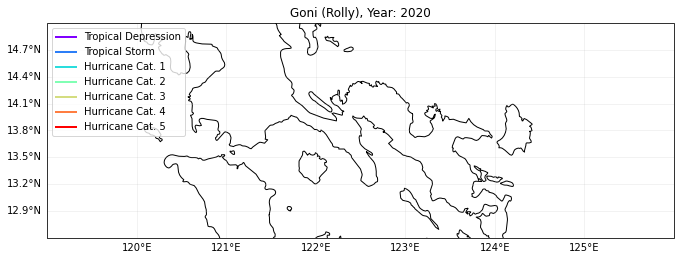

In [6]:
import cartopy
import cartopy.feature as cpf
from matplotlib.pyplot import figure, show
import numpy.random as npr
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs

request = cimgt.OSM()

# ax = tracks_WP.plot()
ax = tracks_NA.plot()


ax.get_legend()._loc = 2 # correct legend location
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title("Goni (Rolly), Year: 2020")
ax.set_extent([119,126,12.6,15])


#ax.add_image(request, 10)

In [32]:
import numpy as np
# select the track
tc_syn = tracks_WP.get_track('2020302N17140')

# 1. Which is the time frequency of the data?
# The values of a DataArray are numpy.arrays.
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(tc_syn.time)
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', tc_syn.max_sustained_wind.groupby('time.day').max())

NameError: name 'tracks_WP' is not defined